In [1]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


## Spacy Embeddings

In [2]:
embeddings = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_spacy_RNN_embeddings_v2.npy')
labels = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_spacy_RNN_values_v2.npy')

### Train/Dev/Test/Split

In [3]:
train_X, test_X, train_y, test_y = train_test_split(embeddings, labels, test_size=0.20, random_state=42)
del embeddings
del labels

In [4]:
train_X.shape

(54544, 202, 300)

In [5]:
test_X.shape

(13636, 202, 300)

## LSTM Models

### Stacked LSTMs (Best model from CORe experiments)

In [6]:
inputs = tf.keras.layers.Input(shape=(202,300))
LSTM1 = tf.keras.layers.LSTM(20, return_sequences=True)(inputs)
LSTM2 = tf.keras.layers.LSTM(20)(LSTM1)
classification_out = tf.keras.layers.Dense(4, activation='softmax')(LSTM2)

model = tf.keras.models.Model(inputs=inputs, outputs=classification_out)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer='adam', 
              metrics=['sparse_categorical_accuracy'])

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 202, 300)]        0         
                                                                 
 lstm (LSTM)                 (None, 202, 20)           25680     
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 4)                 84        
                                                                 
Total params: 29,044
Trainable params: 29,044
Non-trainable params: 0
_________________________________________________________________


In [10]:
train = model.fit(train_X, train_y, epochs=5, validation_split=0.2)


Epoch 1/5
1364/1364 [==============================] - 228s 167ms/step - loss: 1.3864 - sparse_categorical_accuracy: 0.2525 - val_loss: 1.3865 - val_sparse_categorical_accuracy: 0.2482
Epoch 2/5
1364/1364 [==============================] - 222s 163ms/step - loss: 1.3864 - sparse_categorical_accuracy: 0.2527 - val_loss: 1.3865 - val_sparse_categorical_accuracy: 0.2481
Epoch 3/5
1364/1364 [==============================] - 226s 166ms/step - loss: 1.3864 - sparse_categorical_accuracy: 0.2477 - val_loss: 1.3864 - val_sparse_categorical_accuracy: 0.2510
Epoch 4/5
1364/1364 [==============================] - 220s 161ms/step - loss: 1.3864 - sparse_categorical_accuracy: 0.2502 - val_loss: 1.3864 - val_sparse_categorical_accuracy: 0.2510
Epoch 5/5
1364/1364 [==============================] - 223s 163ms/step - loss: 1.3864 - sparse_categorical_accuracy: 0.2509 - val_loss: 1.3863 - val_sparse_categorical_accuracy: 0.2536


In [11]:
model.evaluate(test_X, test_y)

427/427 [==============================] - 16s 36ms/step - loss: 1.3863 - sparse_categorical_accuracy: 0.2512


[1.386324405670166, 0.25117337703704834]

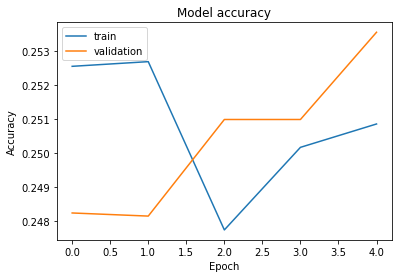

In [12]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

---